In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt


In [111]:
#reading the CSV file
df = pd.read_csv("C:\\Users\\Gacheru\\Downloads\\history.csv")
df.head()

,2021,28.71
0,2020,18.40
1,2019,31.49
2,2018,-4.38
3,2017,21.83
4,2016,11.96


In [112]:
#renaming the coloumns since they had years and return as they coloumn names

df.rename(columns = {'2021':'Year', '28.71':'% Return'}, inplace = True)

In [113]:
df.tail()

,Year,% Return
90,1930,-24.90
91,1929,-8.42
92,1928,43.61
93,1927,37.49
94,1926,11.62


In [114]:
#adding a new row with the missing data
new_row = pd.DataFrame({"Year":2021,"% Return":28.71},index=[0])
df = pd.concat([new_row, df]).reset_index(drop = True)

In [115]:
df.head()

,Year,% Return
0,2021,28.71
1,2020,18.40
2,2019,31.49
3,2018,-4.38
4,2017,21.83


In [116]:
#looking at the data tyes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      96 non-null     int64  
 1   % Return  96 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [117]:
#creating a funct
def filter(x):
    if x <= 1945:
        return "Silent Generation"
    if (x > 1945 and x <=1964 ):
        return "Baby Boomer Generation"
    if (x > 1964 and x <=1980 ):
        return "Generation X"
    if (x > 1981 and x <=1996 ):
        return "Generation Y"
    if (x > 1997 and x <=2012 ):
        return "Generation Z"
    if (x > 2013 and x <=2021 ):
        return "Alpha"
    
#applying the function to the df"Year" column
df["Generation"] = df["Year"].apply(filter)
df

,Year,% Return,Generation
0,2021,28.71,Alpha
1,2020,18.40,Alpha
2,2019,31.49,Alpha
3,2018,-4.38,Alpha
4,2017,21.83,Alpha
...,...,...,...
91,1930,-24.90,Silent Generation
92,1929,-8.42,Silent Generation
93,1928,43.61,Silent Generation
94,1927,37.49,Silent Generation


In [118]:
df

,Year,% Return,Generation
0,2021,28.71,Alpha
1,2020,18.40,Alpha
2,2019,31.49,Alpha
3,2018,-4.38,Alpha
4,2017,21.83,Alpha
...,...,...,...
91,1930,-24.90,Silent Generation
92,1929,-8.42,Silent Generation
93,1928,43.61,Silent Generation
94,1927,37.49,Silent Generation


,Year,% Return,Generation
0,2021,28.71,Alpha
1,2020,18.40,Alpha
2,2019,31.49,Alpha
3,2018,-4.38,Alpha
4,2017,21.83,Alpha
...,...,...,...
91,1930,-24.90,Silent Generation
92,1929,-8.42,Silent Generation
93,1928,43.61,Silent Generation
94,1927,37.49,Silent Generation


In [119]:
#lets take a look at the average mean of the data for the period
df_mean = df["% Return"].mean()
df_mean


12.327604166666662

In [120]:
#median calculation of the data
df_median = df["% Return"].median()
df_median

14.685

In [121]:
#standard deviation and the variance of the data set
df_std_dev = df["% Return"].std()


#the data has a very high stand deviation from the mean

19.632006238191842

In [126]:
#calculating the variance of the returns
import statistics
df_var = statistics.variance(df["% Return"])
df_var


385.4156689364035

In [129]:
#skewness 
import scipy
return_skewness = scipy.stats.skew(df["% Return"],axis=0,bias=True)
return_skewness
#the skewness is negative, mean is on the left, mode highest pint on the right and median middle


-0.4187607320811005

In [133]:
#kurtosis measu
return_kurtosis = scipy.stats.kurtosis(df["% Return"],fisher=False)
return_kurtosis

3.0465301755564416

<AxesSubplot:xlabel='Generation', ylabel='% Return'>

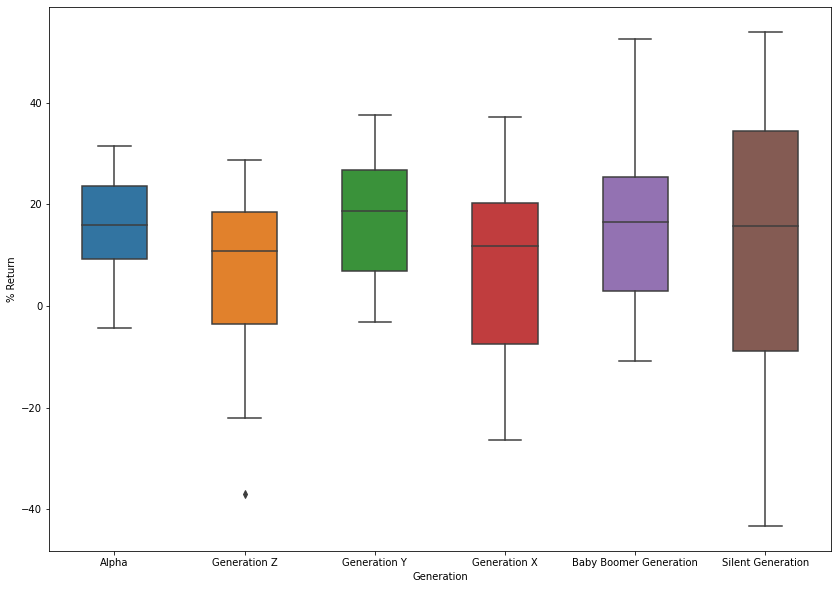

In [122]:
#start visualization of the numerical data based on Generation
#boxplot - of the distr of returns per generation
fig,ax = plt.subplots(figsize=(14,10))
sns.boxplot(data=df,y="% Return",x="Generation",width= 0.5)
